In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot
from c_statistic import find_nearest

In [43]:
g_table = pd.read_csv('../Output/Task2_step4.csv')
g_table.head()

,participant_ID,treatment,part,trial_no,setup_cost_red,setup_cost_blue,red_prior_prob,current_rounds,action_type,suspect,count_red_samples,count_blue_samples,evidence_found,evidence_suspect,posterior,true_guilty_suspect,suspect_accused,time
0,1.0,1.0,2.0,1.0,10.0,10.0,0.1,1,1,0.0,0,0,0,-1.0,0.100000,0.0,0.0,4753.3628
1,1.0,1.0,2.0,2.0,5.0,5.0,0.9,1,1,1.0,0,0,0,-1.0,0.900000,1.0,1.0,2152.3981
2,1.0,1.0,2.0,3.0,40.0,40.0,0.5,1,0,1.0,0,0,0,-1.0,0.500000,1.0,1.0,2502.5501
3,1.0,1.0,2.0,3.0,40.0,40.0,0.5,2,0,1.0,0,1,0,-1.0,0.428571,1.0,1.0,3686.2815
4,1.0,1.0,2.0,3.0,40.0,40.0,0.5,3,1,1.0,0,2,1,1.0,1.000000,1.0,1.0,5353.5514


In [54]:
n_bins = 21
action = g_table.loc[(g_table['action_type'] == 1)].reset_index(drop = True)
post_index = action.columns.to_list().index('posterior')
sus_index = action.columns.to_list().index('suspect')
bins = np.linspace(0,1,n_bins)
binned = [[] for y in range(n_bins)] 
sus_avg_b = []
sus_std_b = []
for key,value in action.iterrows():
    binned[find_nearest(bins, value[post_index])].append(value[sus_index])
for j in binned:
    sus_avg_b.append(np.mean(j))
    sus_std_b.append(np.std(j)/np.sqrt(len(j)))

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] > 0.5)]
post_index = action.columns.to_list().index('posterior')
sus_index = action.columns.to_list().index('suspect')
bins = np.linspace(0,1,n_bins)
binned = [[] for y in range(n_bins)] 
sus_avg_r = []
sus_std_r = []
for key,value in action.iterrows():
    binned[find_nearest(bins, value[post_index])].append(value[sus_index])
for j in binned:
    sus_avg_r.append(np.mean(j))
    sus_std_r.append(np.std(j)/np.sqrt(len(j)))

action = g_table.loc[(g_table['action_type'] == 1) & (g_table['red_prior_prob'] < 0.5)]
post_index = action.columns.to_list().index('posterior')
sus_index = action.columns.to_list().index('suspect')
bins = np.linspace(0,1,n_bins)
binned = [[] for y in range(n_bins)] 
sus_avg_u = []
sus_std_u = []
for key,value in action.iterrows():
    binned[find_nearest(bins, value[post_index])].append(value[sus_index])
for j in binned:
    sus_avg_u.append(np.mean(j))
    sus_std_u.append(np.std(j)/np.sqrt(len(j)))

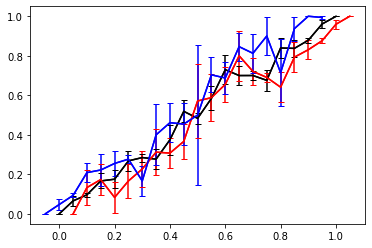

In [55]:
plt.plot(np.linspace(0, 1, n_bins), sus_avg_b, 'black')
plt.errorbar(np.linspace(0, 1, n_bins), sus_avg_b , yerr= sus_std_b, color='black', capsize=3)
plt.plot(np.linspace(0, 1, n_bins)+0.05,sus_avg_r, 'red')
plt.errorbar(np.linspace(0, 1, n_bins)+0.05, sus_avg_r , yerr= sus_std_r, color='red', capsize=3)
plt.plot(np.linspace(0, 1, n_bins)-0.05,sus_avg_u, 'blue')
plt.errorbar(np.linspace(0, 1, n_bins)-0.05, sus_avg_u , yerr= sus_std_u, color='blue', capsize=3)
plt.show()

In [46]:
df = pd.read_csv('../Output/Task2_step4.csv')
costs = list(set(df['setup_cost_red'].to_list()))
costs.sort()
heatmap = []
for i in costs:
    temp = []
    for j in [0.1,0.3,0.5,0.7,0.9]:
        df_sub = df.loc[(df['setup_cost_red'] == i) & (df['red_prior_prob'] == j)]
        df_first = df_sub.loc[(df_sub['current_rounds'] == 1) & (df_sub['action_type'] == 1)]
        temp.append(len(df_first)/len(df_sub))
    heatmap.append(temp)

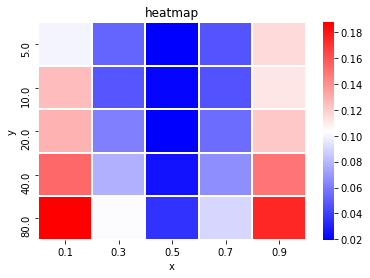

In [47]:
plot.heatmap('heatmap', heatmap, 'x', 'y', colors='bwr', xtick=[0.1,0.3,0.5,0.7,0.9], ytick = costs)

In [62]:
df = pd.read_csv('../Output/Task2_step4.csv')
df = df.loc[df['action_type'] != 1]
costs = list(set(df['setup_cost_red'].to_list()))
costs.sort()
heatmap = []
for i in costs:
    temp = []
    for j in [0.1,0.3,0.5,0.7,0.9]:
        df_sub = df.loc[(df['setup_cost_red'] == i) & (df['red_prior_prob'] == j)]
        df_first = df_sub.loc[(df_sub['suspect'] == 1)]
        temp.append(len(df_first)/len(df_sub))
    heatmap.append(temp)

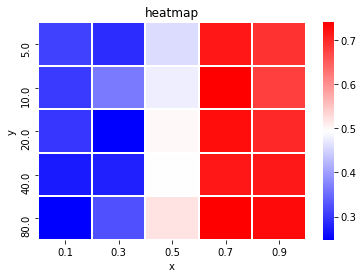

In [63]:
plot.heatmap('heatmap', heatmap, 'x', 'y', colors='bwr', xtick=[0.1,0.3,0.5,0.7,0.9], ytick = costs)

In [58]:
df = pd.read_csv('../Output/Task2_step4.csv')
costs = list(set(df['setup_cost_red'].to_list()))
n_bins = 13
bins = np.linspace(0,1,n_bins)
costs.sort()
heatmap = []
for i in costs:
    action = df.loc[(df['setup_cost_red'] == i) & (df['evidence_found'] != 1)  & (df['action_type'] != 1)]
    post_index = action.columns.to_list().index('posterior')
    sus_index = action.columns.to_list().index('suspect')
    sus_avg_b = []
    binned = [[] for y in range(n_bins)] 
    for key,value in action.iterrows(): binned[find_nearest(bins, value[post_index])].append(value[sus_index])
    for j in binned: sus_avg_b.append(np.mean(j))
    heatmap.append(sus_avg_b)

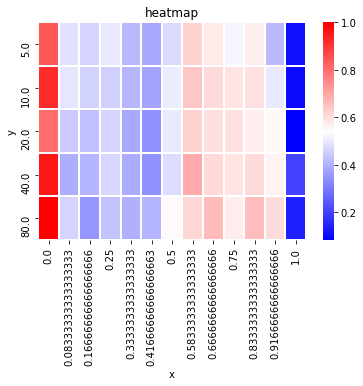

In [59]:
plot.heatmap('heatmap', heatmap, 'x', 'y', colors='bwr', xtick=bins, ytick = costs)